<a href="https://colab.research.google.com/github/Jegovila/SSPIA1/blob/main/13%20Algoritmo%20de%20Luci%C3%A9rnaga/C%C3%B3digos/Algoritmo_de_Luci%C3%A9rnaga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -nc 'https://raw.githubusercontent.com/Jegovila/SSPIA1/main/13%20Algoritmo%20de%20Luci%C3%A9rnaga/C%C3%B3digos/Plot_Contour.py'
!wget -nc 'https://raw.githubusercontent.com/Jegovila/SSPIA1/main/13%20Algoritmo%20de%20Luci%C3%A9rnaga/C%C3%B3digos/Plot_Surf.py'

import matplotlib.pyplot as plt
import numpy as np
from Plot_Surf import *
from Plot_Contour import *
from IPython import display
import math

--2023-11-17 02:38:53--  https://raw.githubusercontent.com/Jegovila/SSPIA1/main/13%20Algoritmo%20de%20Luci%C3%A9rnaga/C%C3%B3digos/Plot_Contour.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 649 [text/plain]
Saving to: ‘Plot_Contour.py’

Plot_Contour.py     100%[===================>]     649  --.-KB/s    in 0s      

2023-11-17 02:38:53 (28.0 MB/s) - ‘Plot_Contour.py’ saved [649/649]

--2023-11-17 02:38:54--  https://raw.githubusercontent.com/Jegovila/SSPIA1/main/13%20Algoritmo%20de%20Luci%C3%A9rnaga/C%C3%B3digos/Plot_Surf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP re

Función objetivo

In [13]:
#f = lambda x, y: (x-2)**2 + (y-2)**2
#f = lambda x, y: 10*2 + x**2 + y**2 - 10*np.cos(2*np.pi*x) - 10*np.cos(2*np.pi*y)

#f = lambda x, y: ((x**2/4000)+(y**2/4000))-(np.cos(x)*np.cos(y/np.sqrt(2)))+1  #Griewank
#f = lambda x, y: 10*2 + x**2 + y**2 - 10*np.cos(2*np.pi*x) - 10*np.cos(2*np.pi*y)    #Rastrigin
f = lambda x, y: (x**2)+(y**2)   #Sphere

Parámetros

In [9]:
xl = np.array([-5, -5])
xu = np.array([5, 5])

D = 2
G = 100
N = 50

beta0 = 0.5 # 0.1, 0.6
gamma = 0.6 # 0.1, 0.8

alpha = 2.5 # 0.5, 1.5
delta = 0.95 # 0.01, 0.95

x = np.zeros((D, N))
I = np.zeros(N)

# FA

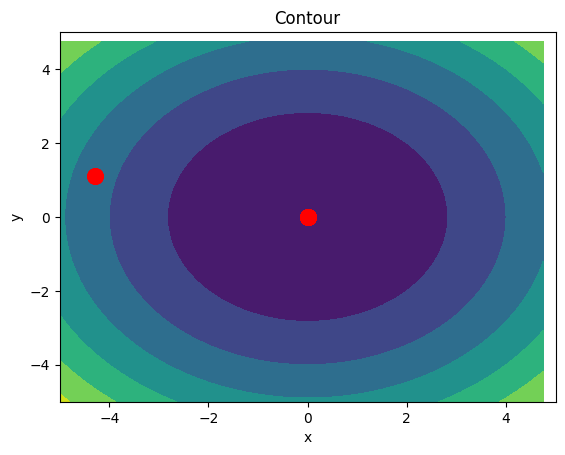

Mínimo global en x= 0.0049412527533387995  y= -0.0029990541056487048  f(x,y)= 3.341030430098662e-05


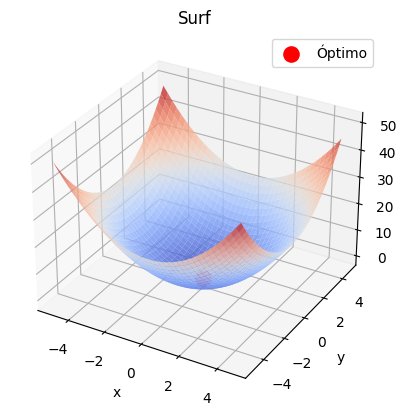

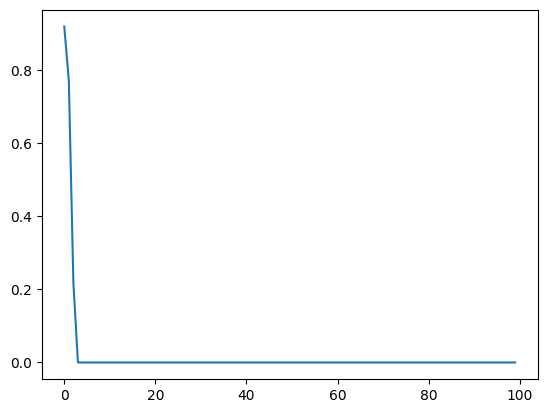

In [14]:
for i in range(N):
    x[:, i] = xl + (xu - xl) * np.random.rand(D)
    I[i] = f(x[0, i], x[1, i])

fx_plot = np.zeros(G)

for g in range(G):
    display.display(plt.gcf())
    display.clear_output(wait=True)
    plot_contour(f, x, xl, xu)

    for i in range(N):
        for j in range(N):
            if I[j] < I[i]:
                rij = np.linalg.norm(x[:, i] - x[:, j])
                r = np.random.rand(D)

                x[:, i] = x[:, i] + beta0 * np.exp(-gamma * (rij ** 2)) * (x[:, j] - x[:, i]) + alpha * (r - 0.5)

                I[i] = f(x[0, i], x[1, i])

    alpha = delta * alpha
    fx_plot[g] = np.min(I)


igb = np.argmin(I)

print("Mínimo global en x=", x[0, igb], " y=", x[1, igb], " f(x,y)=", f(x[0, igb], x[1, igb]))
plot_surf(f, x, xl, xu, igb)
plt.plot(fx_plot)